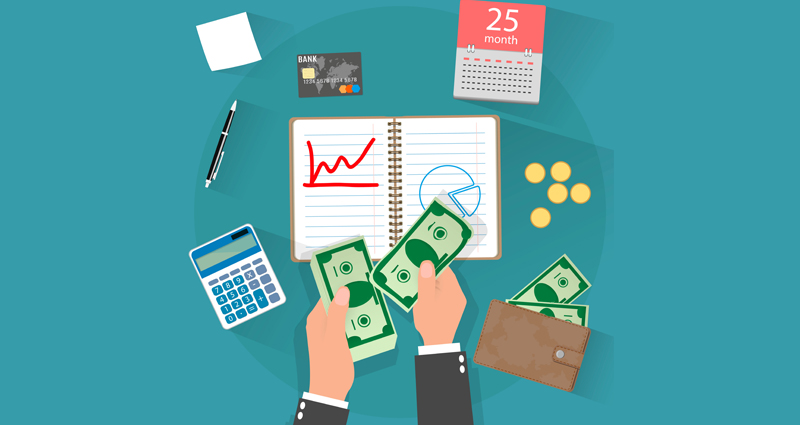

In [1]:
from IPython.display import Image
Image("what-is-annual-income.jpg", width = 650)

# Final Capstone: Income Prediction

My capstone project is to create a model that can accurately classify if a person makes less or more than $50,000 a year.


## Why predict a person's income?

The US Census Bureau collects income data annually in order to analyze it and determine the profiles of people that make a certain amount of money each year. This information could prove useful to them in many ways. The problem I want to solve is to use data from the US Census Bureau to predict the the income amount of a persons based on features such as education, occupation, race, sex, native country, etc. If they wanted to focus on a specific amount such $50,000 a year, I could then create a model to classify if a person’s income is below or above that amount.

This solution could prove valuable because the Income Census Bureau may want to use
this model for their annual income data to determine the profile of a person that
makes above a certain amount and below a certain amount. They have the data,
but may not be able to fully use the data to their advantage. By analyzing it and
creating an accurate classification model, we could use it to determine what are the key
factors that determine a person's income amount.

Marketing companies could also use this prediction information in order to target
high-income individuals as their target consumers in order to increase sales and
profits. The information from this prediction model could also be used for college
students to look into what choices could lead to higher income in the future.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
%matplotlib inline
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

## The Data

I will use a data set from Kaggle that was taken from the 1994 Census bureau website. I will look at the raw data, then use some feature engineering to clean the data if necessary. In order to clean the data, I will first check for any strange characters or NaN values in the data set. Then, I will change categorical values to numeric such as changing male and female to 0 and 1, assigning workclass types to numbers, changing income below 50,000 and above 50,000 to binary values, etc. I will also change marital status to single and married to simplify the classification. Once the categorical values are all changed to numeric, I will heatmap to check for correlations between thefeatures.

In [4]:
df = pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Analyze Data

The target variable will be income. The features I will use for my model will be age, workclass, fnlwgt, education.num, marital.status, relationship, race, sex, capitalgain, capital.loss, and hours.per.week. All other columns will be dropped because they have too many categories. 

In [6]:
df['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [7]:
df['capital.loss'].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0], dtype=int64)

In [8]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

In [9]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'], dtype=object)

In [10]:
#drop
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'], dtype=object)

In [11]:
# represents education
df['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1], dtype=int64)

In [12]:
#drop
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving',
       'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [13]:
df.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [14]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [15]:
#drop
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [16]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

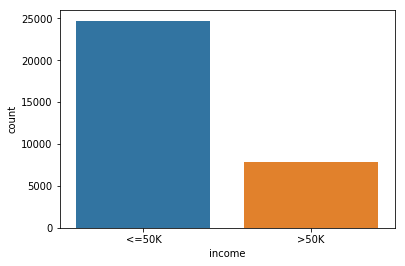

In [17]:
sns.countplot(df['income'])
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Feature Engineering

Here I will change categorical values to numeric. The target variable 'income' will be changed to binary values. 0 will represent <= 50,000 and 1 will represent > 50,0000. I changed work.class to numeric values, grouped the marital.status categories by number, and changed all other categorical values to numeric. 

In [19]:
df['marital.status'] = df['marital.status'].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df['marital.status'] = df['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
df['marital.status'] = df['marital.status'].map({'Married':1, 'Single':0})
df['marital.status'] = df['marital.status'].astype(int)

In [20]:
df['workclass'] = df['workclass'].map({'State-gov':0, 'Federal-gov':1, 'Local-gov':2, 'Self-emp-inc':3,
                                            'Self-emp-not-inc':4, 'Never-worked':5, '?':6, 'Private':7, 'Without-pay':8})
df['workclass'] = df['workclass'].astype(int)

In [21]:
df['relationship'] = df['relationship'].map({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,
                                            'Husband':4, 'Wife':5})
df['relationship'] = df['relationship'].astype(int)

In [22]:
df['race'] = df['race'].map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Other':3,
                                            'Amer-Indian-Eskimo':4})
df['race'] = df['race'].astype(int)

In [23]:
df['sex'] = df['sex'].map({'Male': 0, 'Female':1})
df['sex'] = df['sex'].astype(int)

In [24]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
#df['income'] = df['income'].astype(int)


In [66]:
df = df[['age','workclass', 'fnlwgt', 'education.num', 'marital.status', 'relationship', 'race', 'sex', 'capital.gain', 
        'capital.loss', 'hours.per.week', 'income']]
df.head()

,age,workclass,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,6,77053,9,0,0,0,1,0,4356,40,0
1,82,7,132870,9,0,0,0,1,0,4356,18,0
2,66,6,186061,10,0,1,1,1,0,4356,40,0
3,54,7,140359,4,0,1,0,1,0,3900,40,0
4,41,7,264663,10,0,2,0,1,0,3900,40,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null int32
fnlwgt            32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
income            32561 non-null int64
dtypes: int32(5), int64(7)
memory usage: 2.4 MB


In [27]:
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,5.795062,1.897784e+05,10.080679,0.473481,2.369000,0.222935,0.330795,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.116214,1.055500e+05,2.572720,0.499304,1.753353,0.633734,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,6.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,7.000000,1.783560e+05,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,7.000000,2.370510e+05,12.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,1.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


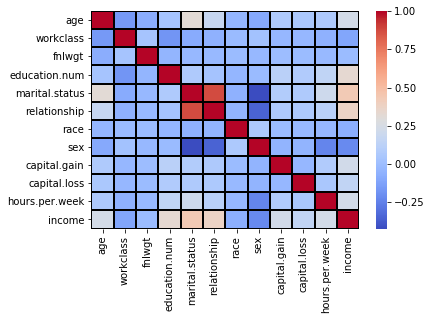

In [28]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, linecolor='k', linewidths=1, cmap= 'coolwarm')

We can see in the heat map, that the features are not highly correlated with one another. So we can won;t runt into any multicollinearity issues.

## Data Visualization

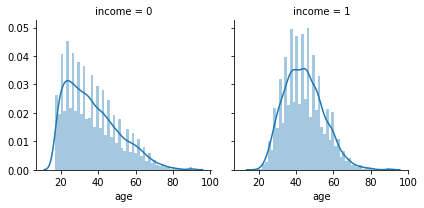

In [29]:
a= sns.FacetGrid(df, col='income')
a.map(sns.distplot, 'age')
plt.show()

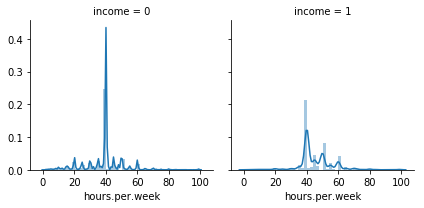

In [30]:
h = sns.FacetGrid(df, col='income')
h.map(sns.distplot, 'hours.per.week')
plt.show()

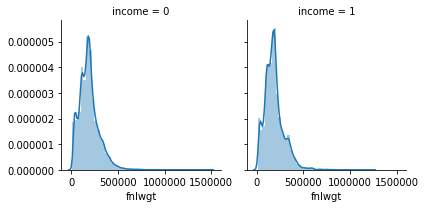

In [31]:
f = sns.FacetGrid(df, col='income')
f.map(sns.distplot, 'fnlwgt')
plt.show()
#A single cell estimate of the population 16+ for each state. Controls for Hispanic Origin by age and sex.
#Controls by Race, age and sex.

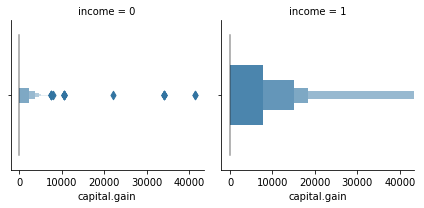

In [32]:
cg = sns.FacetGrid(df, col='income')
cg.map(sns.boxenplot, 'capital.gain')
plt.show()

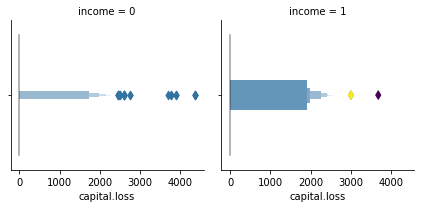

In [33]:
cl = sns.FacetGrid(df, col='income')
cl.map(sns.boxenplot, 'capital.loss')
plt.show()

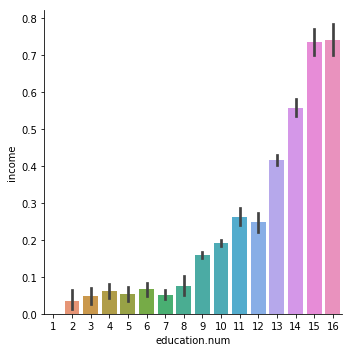

In [34]:
# 'HS-grad': 9, 'Some-college': 10, '7th-8th': 4, '10th': 6, 'Doctorate': 16,
# 'Prof-school': 15, 'Bachelors': 13, 'Masters': 14, '11th': 7, 'Assoc-acdm': 12,
# 'Assoc-voc': 11, '1st-4th': 2, '5th-6th' :3, '12th': 8, '9th': 5, 'Preschool': 1
sns.factorplot(x='education.num',y='income',data=df,kind='bar',size = 5)
plt.show()

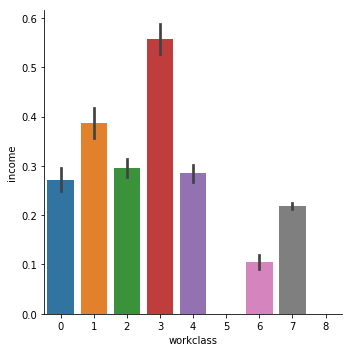

In [35]:
# 'State-gov':0, 'Federal-gov':1, 'Local-gov':2, 'Self-emp-inc':3,
# 'Self-emp-not-inc':4, 'Never-worked':5, '?':6, 'Private':7, 'Without-pay':8
sns.factorplot(x='workclass',y='income',data=df,kind='bar',size = 5)
plt.show()

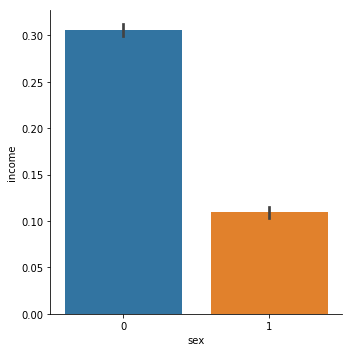

In [36]:
#'Male': 0, 'Female':1
sns.factorplot(x='sex',y='income',data=df,kind='bar',size = 5)
plt.show()

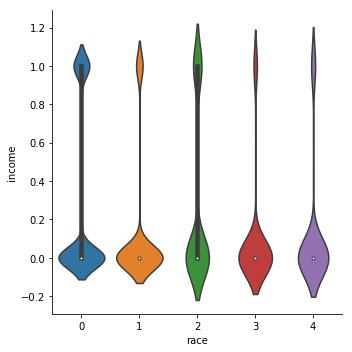

In [37]:
#'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Other':3,'Amer-Indian-Eskimo':4
sns.factorplot(x='race',y='income',data=df,kind='violin',size = 5)
plt.show()

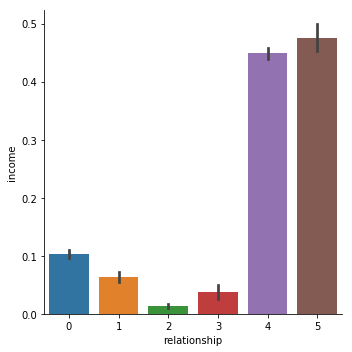

In [38]:
#'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,'Husband':4, 'Wife':5
sns.factorplot(x='relationship',y='income',kind = 'bar', data=df,size = 5)
plt.show()

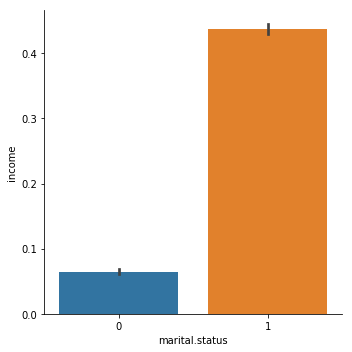

In [39]:
#'Married':1, 'Single':0
sns.factorplot(x='marital.status',y='income',data=df,kind='bar',size = 5)
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
age               32561 non-null int64
workclass         32561 non-null int32
fnlwgt            32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
income            32561 non-null int64
dtypes: int32(5), int64(7)
memory usage: 2.4 MB


In [41]:
#array = df.values
#X = array[:, 0:11]
#y = array[:, 11]
X = df.drop(['income'], axis=1)
y = df.income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X.shape)
print(y.shape)

(32561, 11)
(32561,)


## Models

My goal is to create a classification model that has an accuracy close to 90%.  I will create seven different models. Then I will compare the accuracy scores to determine which is the best model to classify if an individual's income is less than 50,000 
or more than 50,000. To create the models, I will use seven different models using logistic regression, KNN, Decision Trees, Gradient boosting,XG boosting, and Keras Neural Network model. 

## Logistic Regression

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
cv = cross_val_score(lr, X_test, y_test, cv = 5, scoring = 'accuracy')
print("%s: %f (%f)" % ('Log Regression', cv.mean(), cv.std()))

Log Regression: 0.800707 (0.009845)


In [43]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, lr.predict(X_test))))
print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Accuracy: 79.7635498234%
[[4787  189]
 [1129  408]]
             precision    recall  f1-score   support

          0       0.81      0.96      0.88      4976
          1       0.68      0.27      0.38      1537

avg / total       0.78      0.80      0.76      6513



## KNN

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
cv = cross_val_score(knn, X_test, y_test, cv = 5, scoring = 'accuracy')

print("%s: %f (%f)" % ('KNN', cv.mean(), cv.std()))

KNN: 0.764163 (0.003986)


In [45]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, knn.predict(X_test))))
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy: 77.8443113772%
[[4574  402]
 [1041  496]]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86      4976
          1       0.55      0.32      0.41      1537

avg / total       0.75      0.78      0.76      6513



## Decision Tree Classifier

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
cv = cross_val_score(dt, X_test, y_test, cv = 5, scoring = 'accuracy')

print("%s: %f (%f)" % ('Decision Tree', cv.mean(), cv.std()))

Decision Tree: 0.807000 (0.010825)


In [47]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, dt.predict(X_test))))
print(confusion_matrix(y_test, dt.predict(X_test)))
print(classification_report(y_test, dt.predict(X_test)))

Accuracy: 81.2682327652%
[[4335  641]
 [ 579  958]]
             precision    recall  f1-score   support

          0       0.88      0.87      0.88      4976
          1       0.60      0.62      0.61      1537

avg / total       0.82      0.81      0.81      6513



## Random Forest Classfier

In [48]:
rf = RandomForestClassifier(n_estimators= 100, max_features= 10)
rf.fit(X_train, y_train)
cv = cross_val_score(rf, X_test, y_test, cv = 5, scoring = 'accuracy')

print("%s: %f (%f)" % ('Random Forest', cv.mean(), cv.std()))

Random Forest: 0.844310 (0.006830)


In [49]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, rf.predict(X_test))))
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

Accuracy: 84.8456932289%
[[4567  409]
 [ 578  959]]
             precision    recall  f1-score   support

          0       0.89      0.92      0.90      4976
          1       0.70      0.62      0.66      1537

avg / total       0.84      0.85      0.85      6513



## Gradient Boosting Classifier

In [50]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
cv = cross_val_score(gb, X_test, y_test, cv = 5, scoring = 'accuracy')
print("%s: %f (%f)" % ('Gradient Boosting', cv.mean(), cv.std()))

Gradient Boosting: 0.860278 (0.006590)


In [51]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, gb.predict(X_test))))
print(confusion_matrix(y_test, gb.predict(X_test)))
print(classification_report(y_test, gb.predict(X_test)))

Accuracy: 86.3196683556%
[[4711  265]
 [ 626  911]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      4976
          1       0.77      0.59      0.67      1537

avg / total       0.86      0.86      0.86      6513



## XG Boost Classfier

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
cv = cross_val_score(xgb, X_test, y_test, cv = 5, scoring = 'accuracy')
print("%s: %f (%f)" % ('XG Boosting', cv.mean(), cv.std()))

XG Boosting: 0.858896 (0.007791)


In [53]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, xgb.predict(X_test))))
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

Accuracy: 86.2275449102%
[[4728  248]
 [ 649  888]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      4976
          1       0.78      0.58      0.66      1537

avg / total       0.86      0.86      0.85      6513



## Keras NN Model

In [54]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model

Using TensorFlow backend.


In [55]:
model = Sequential()

model.add(Dense(64, input_dim=11, init='uniform', activation='relu'))
model.add(Dense(11, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data= (X_test, y_test) )

Train on 26048 samples, validate on 6513 samples
Epoch 1/20
26048/26048 [==============================] - 5s 188us/step - loss: 10.2484 - acc: 0.3558 - val_loss: 12.1801 - val_acc: 0.2360
Epoch 2/20
26048/26048 [==============================] - 4s 160us/step - loss: 7.6419 - acc: 0.5220 - val_loss: 3.8037 - val_acc: 0.7640
Epoch 3/20
26048/26048 [==============================] - 4s 156us/step - loss: 3.9008 - acc: 0.7580 - val_loss: 3.8037 - val_acc: 0.7640
Epoch 4/20
26048/26048 [==============================] - 5s 177us/step - loss: 3.9008 - acc: 0.7580 - val_loss: 3.8037 - val_acc: 0.7640
Epoch 5/20
26048/26048 [==============================] - 5s 198us/step - loss: 3.9008 - acc: 0.7580 - val_loss: 3.8037 - val_acc: 0.7640
Epoch 6/20
26048/26048 [==============================] - 6s 248us/step - loss: 3.9008 - acc: 0.7580 - val_loss: 3.8037 - val_acc: 0.7640
Epoch 7/20
26048/26048 [==============================] - 6s 245us/step - loss: 3.9008 - acc: 0.7580 - val_loss: 3.8037 -

In [58]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6513/6513 [==============================] - 0s 31us/step

acc: 76.40%


Out of the seven models, it seems that the best model was the XG boosting model with an accuracy score of 86%. I will do some tuning in order to improve the accuracy score. 

## Tuning the Best Model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = .2,
                                                    random_state=12)

## XG Boosting Model

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
cv = cross_val_score(xgb, X_test, y_test, cv = 5, scoring = 'accuracy')
print("%s: %f (%f)" % ('XG Boosting', cv.mean(), cv.std()))

XG Boosting: 0.866420 (0.011390)


In [61]:
print("Accuracy: %s%%" % (100*accuracy_score(y_test, xgb.predict(X_test))))
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

Accuracy: 86.8724090281%
[[4708  238]
 [ 617  950]]
             precision    recall  f1-score   support

          0       0.88      0.95      0.92      4946
          1       0.80      0.61      0.69      1567

avg / total       0.86      0.87      0.86      6513



In [62]:
feature_list = list(X.columns)
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [63]:
feature_importances = feature_importances[:11]

Best Model is XG Boosting
Feature rank among 11 features:
capital.gain      0.157
age               0.149
education.num     0.147
capital.loss      0.145
relationship      0.128
hours.per.week    0.102
fnlwgt            0.057
workclass         0.055
race              0.021
sex               0.019
marital.status    0.019
dtype: float64


Text(0.5,0,'relative importance')

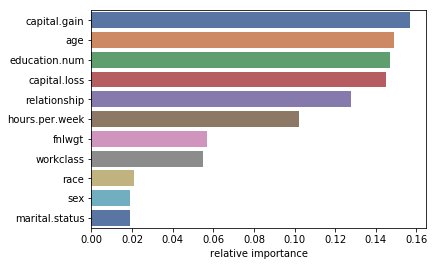

In [64]:
print('Best Model is XG Boosting')
print('===============================')
f_im = gb.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)
print("Feature rank among 11 features:")
print(ser_rank)
plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

# Conclusion

-   After comparing different models for classifying if a person's income amount is under or over 50,000, it seems that best model was the XG boosting model. This model had an accuracy score of 86%.

-  Other models that were used such as logistic regression, KNN, decision trees, random forest, decision trees, and Keras NN were pretty good, but did not perform as well as the gradient boosting model.

-  Looking at our features, the top 3 most important features were capital.loss, capital.gain, and education. So it seems that capital, education, age and hours per week significantly affect the amount of income per person. 

-   This capstone project helped me to further understand to explore data, implement feature engineering, and create different types of models for classification.

## Next Steps

- Even though the accuracy score of my model was 86%, I would still like to improve it perhaps by creating features in order to raise the accuracy score.

- I would like to conduct more research on the features in order to learn about them and understand why they are so important and what they represent.

- Also, I would like to test my model on a similar data set from a different year to see how it performs on a different data set. 

- I believe this model could prove useful for the Census bureau in classifying future income data.